## Cluster Analysis in Python

### CHAPTER 1. Introduction to Clustering

#### 1.1 Unsupervised learning: basics

Everyday example: Google News
* How does Google News classify articles?
* Technique: unsupervised learning algorithm: clustering!
* How: match frequent terms in articles to find similarity

What is unsupervised learning?
* A group of machine learning algorithms that find patterns in data
* Data for algorithms has **NOT** been **labeled, classified or characterized**
* The objective of the algorithm is to interpret any structure in the data
* Common unsupervised learning algorithms:
    * Clustering
    * Neural networks
    * Anomaly detection

What is clustering?
* The process of grouping items with similar characteristics
* Items in groups similar to each other than in other groups


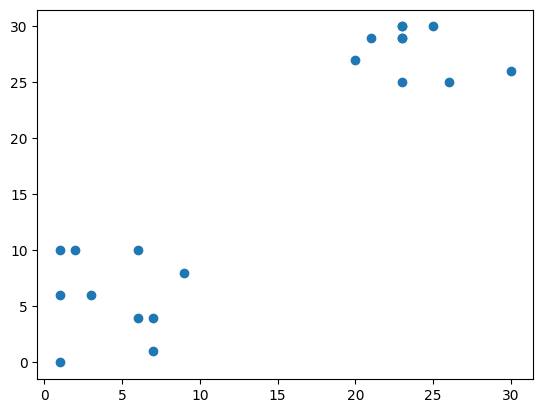

In [1]:
# pokemon sightings
from matplotlib import pyplot as plt
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]
plt.scatter(x, y)
plt.show()
# from the plot, we can tell there are 2 clusters.

#### 1.2 Basics of cluster analysis

What is a cluster?
* A group of items with similar characteristics
* Examples:
    * Google News: articles where similar words and word associations appear together
    * Customer Segments

Clustering algorithms:
* Hierarchical clustering (studied in this course)
* K means clustering (studied in this course)
* DBSCAN
* Gaussian Methods

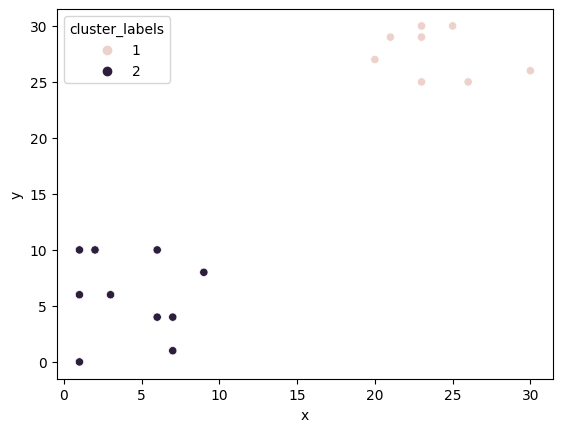

In [2]:
# hierarchical clustering in SciPy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

# create a dataframe 'df'
df = pd.DataFrame({'x': x,
                  'y': y
})

# compute distance
Z = linkage(df, 'ward')

# generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

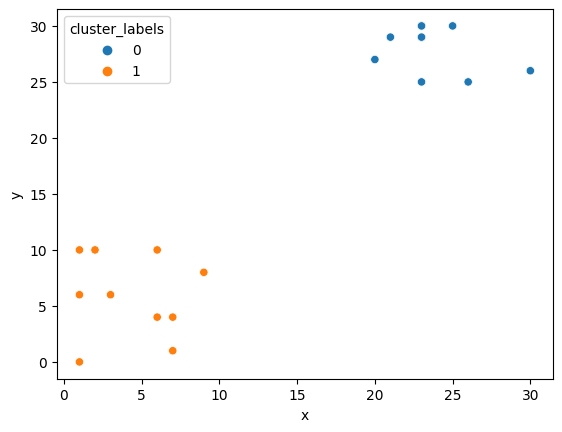

In [11]:
# K-means clustering in SciPy
from scipy.cluster.vq import kmeans, vq

# change data types
df = pd.DataFrame({'x': x,
                   'y': y
                   })
df['x'] = df['x'].astype('float')
df['y'] = df['y'].astype('float')

# # compute cluster centers
centroids,_ = kmeans(df, 2)
#
# # assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

#### 1.3 Data preparation for cluster analysis

Why prepare data for clustering?
* Variables have incomparable units
* Variables have different scales and variances
* Data in raw form may lead to bias in clustering
* Clusters may be heavily dependent on one variable
* Solution: **normalization** of individual variables!

What is normalization?
* Process of rescaling data to a standard deviation of 1
$$x_new = x / std_dev(x) $$

In [12]:
# normalize basic list data
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt

# initial data
goals_for  = [4,3,2,3,1,1,2,0,1,4]

# normalize data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


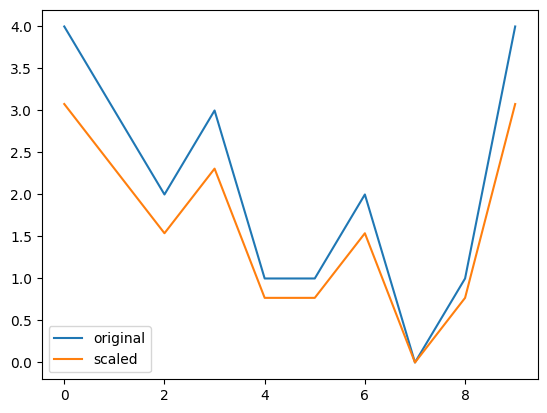

In [13]:
# visualize original and scaled data
plt.plot(goals_for, label='original')
plt.plot(scaled_data, label='scaled')
plt.legend()
plt.show()

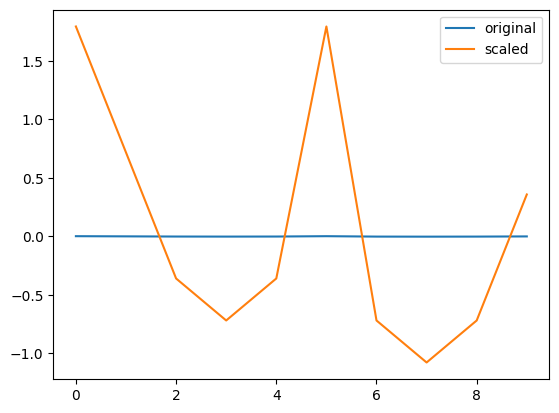

In [14]:
# normalization of small numbers

# prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# normalize data
scaled_data = whiten(rate_cuts)

# visualize data
plt.plot(rate_cuts, label='original')
plt.plot(scaled_data, label='scaled')
plt.legend()
plt.show()


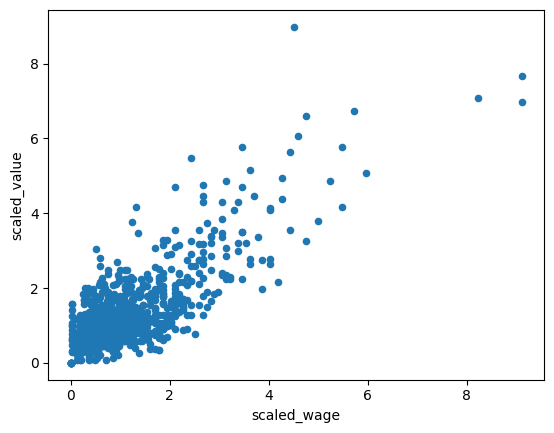

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [18]:
# FIFA 18: normalize data
import pandas as pd
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt

# get dataset
fifa = pd.read_csv('6_datasets/fifa_18_sample_data.csv')

# get two columns and scale them
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# plot two columns
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

# check mean and std_dev
print(fifa[['scaled_wage', 'scaled_value']].describe())

### CHAPTER 2. K-Means Clustering

#### 2.1 Basics of k-means clustering




#### 2.2 How many clusters?



#### 2.3 Limitations of k-means clustering

